<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/Extra_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Extra Trees Regressor Evaluation
MAE: 2.5131799999999997
MSE: 8.533214399999999
R² Score: -0.05116032471451959

📊 Extra Trees Classifier Evaluation
Accuracy: 0.361
Classification Report:
               precision    recall  f1-score   support

        Poor       0.41      0.65      0.50       394
     Average       0.30      0.18      0.23       310
        Good       0.25      0.17      0.20       296

    accuracy                           0.36      1000
   macro avg       0.32      0.33      0.31      1000
weighted avg       0.33      0.36      0.33      1000

Confusion Matrix:
 [[256  58  80]
 [189  56  65]
 [177  70  49]]


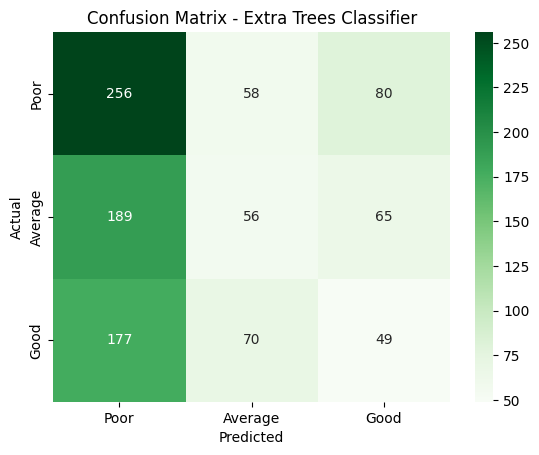

In [1]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/sleep_pattern_analysis_datasett.csv')

# 🧹 Step 3: Clean data
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 4: Features and Targets
X = df.drop('Sleep Quality', axis=1)
y_reg = df['Sleep Quality']  # For regression
y_class = y_reg.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))  # For classification

# ⚖ Step 5: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 🌲 Step 6A: ExtraTrees Regressor
# ------------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

et_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_reg.fit(X_train_r, y_train_r)
y_pred_r = et_reg.predict(X_test_r)

print("📊 Extra Trees Regressor Evaluation")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# ------------------------------
# 🌳 Step 6B: ExtraTrees Classifier
# ------------------------------
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train_c, y_train_c)
y_pred_c = et_clf.predict(X_test_c)

print("\n📊 Extra Trees Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 🔍 Confusion Matrix Plot
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',
            xticklabels=["Poor", "Average", "Good"],
            yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - Extra Trees Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
